In [1]:
# !pip install numpy pandas scipy anndata

In [2]:
# %pip install anndata

In [16]:
# only need to run this command once, after that you can use the package
#pip install git+https://github.com/l1joseph/IDEA.git


In [58]:
import idea

In [59]:
import pandas as pd

# Read the file into a DataFrame, specifying the first column as the index
filtered_df = pd.read_csv("./data/GSE255777_RawCounts_human.csv", index_col=0, header=0)

# Drop the first column
#filtered_df = filtered_df.iloc[:, 1:]

# # Transpose the DataFrame
counts = filtered_df.transpose()
counts.columns = counts.iloc[0]
counts = counts[1:]

# Add pseudocount
counts = counts + 1
min_sum = 10  # Replace with your desired minimum sum
counts = counts.loc[counts.sum(axis=1) >= min_sum, :]

# Display the transposed DataFrame
counts = counts.astype(float)
counts

Gene,ENSG00000223972,ENSG00000227232,ENSG00000278267,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000268903,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000210196
APAP,9.0,325.0,16.0,1.0,1.0,3.0,2.0,26.0,31.0,19.0,...,2150.0,33388.0,206207.0,6669.0,9600.0,70858.0,55519.0,6423.0,42916.0,3910.0
Control.1,6.0,205.0,16.0,1.0,1.0,1.0,1.0,15.0,48.0,19.0,...,2439.0,41393.0,134203.0,10622.0,11569.0,77001.0,55072.0,6233.0,39157.0,3013.0
Control.2,10.0,249.0,17.0,2.0,1.0,1.0,1.0,17.0,44.0,28.0,...,2114.0,33839.0,143667.0,10395.0,8680.0,60473.0,38616.0,5286.0,36352.0,1921.0


In [60]:

# Define the names of the conditions
conditions = ["APAP", "Control", "Control"]

# Create a DataFrame containing the conditions
sample_info = pd.DataFrame({
    'condition': conditions
})

# Display the DataFrame
sample_info

,condition
0,APAP
1,Control
2,Control


In [61]:
dds = idea.IDEADataSet(counts, sample_info)

In [62]:
adata = dds.to_anndata()

In [63]:
# Perform normalization
print("Estimating size factors...")
idea.size_factors(adata)
print("Normalizing counts...")
idea.normalize_counts(adata)

Estimating size factors...
Normalizing counts...


AnnData object with n_obs × n_vars = 3 × 43320
    obs: 'condition', 'size_factors'
    layers: 'normalized'

In [64]:

# Estimate dispersions on the filtered data
print("Estimating dispersions...")
idea.estimate_dispersions(adata)
print("Fitting dispersion trend...")
idea.fit_dispersion_trend(adata)
print("Shrinking dispersions...")
idea.shrink_dispersions(adata)


adata.var

Estimating dispersions...
Fitting dispersion trend...
Shrinking dispersions...


,dispersion,fitted_dispersion,shrunken_dispersion
Gene,,,
ENSG00000223972,0.346667,117.523773,0.345647
ENSG00000227232,9.461703,146.633857,8.888184
ENSG00000278267,0.013605,132.254519,0.013604
ENSG00000243485,0.166667,-40.371411,0.167358
ENSG00000237613,0.000000,-103.028230,0.000000
...,...,...,...
ENSG00000198886,670.019421,147.595437,120.951580
ENSG00000198786,1243.710983,147.594007,131.936770
ENSG00000198695,41.349497,147.557139,32.298566


In [65]:
import warnings
# Disable warnings
warnings.filterwarnings("ignore")

# Perform differential expression analysis
contrast = ('condition', 'APAP', 'Control')
print("Performing differential expression analysis...")
results = idea.runidea(adata, contrast)

# Print results
print("Differential expression analysis results:")
df_results = results.get_results()
print(df_results.head())

Performing differential expression analysis...
Differential expression analysis results:
              gene  log2_fold_change  statistic   p_value      padj
0  ENSG00000223972          0.134973   0.010909  0.916814  0.999984
1  ENSG00000227232         -0.107085   0.007619  0.930444  0.999984
2  ENSG00000278267          0.282141   0.050014  0.823038  0.999984
3  ENSG00000243485          0.658747   0.152806  0.695869  0.999984
4  ENSG00000237613          0.251178   0.021182  0.884283  0.999984


Plotting Volcano plot...
         gene_name  log2_fold_change  statistic   p_value      padj  \
0  ENSG00000223972          0.134973   0.010909  0.916814  0.999984   
1  ENSG00000227232         -0.107085   0.007619  0.930444  0.999984   
2  ENSG00000278267          0.282141   0.050014  0.823038  0.999984   
3  ENSG00000243485          0.658747   0.152806  0.695869  0.999984   
4  ENSG00000237613          0.251178   0.021182  0.884283  0.999984   

   -log10_pvalue  significance      regulation  
0       0.037719         False  nonsignificant  
1       0.031310         False  nonsignificant  
2       0.084580         False  nonsignificant  
3       0.157473         False  nonsignificant  
4       0.053409         False  nonsignificant  


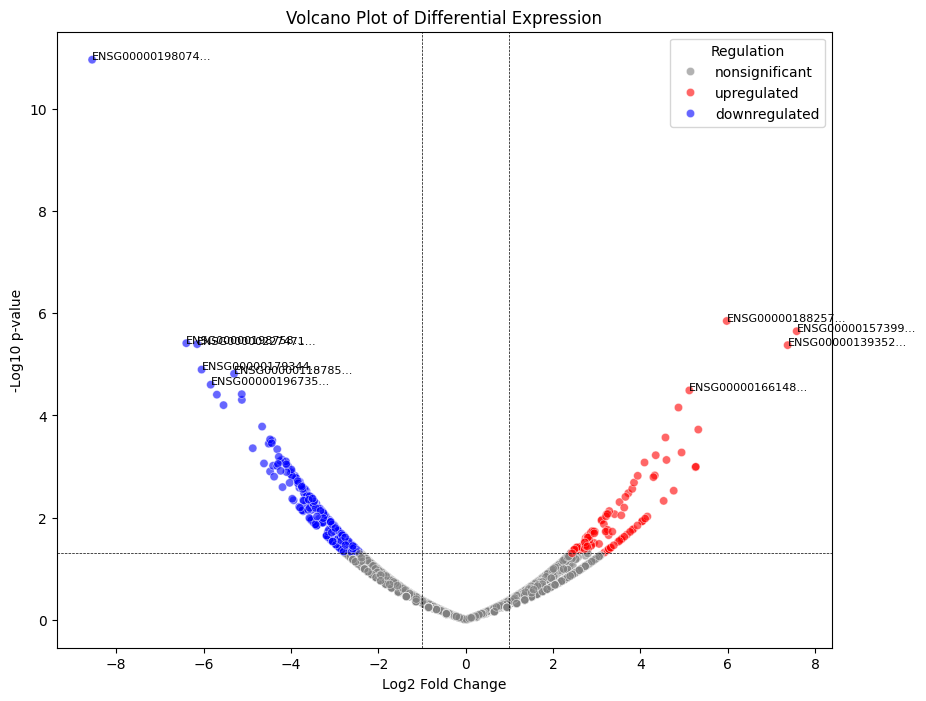

Plotting heatmap...


KeyError: 'gene'

In [67]:
# Visualize differentially expressed genes
print("Plotting Volcano plot...")
df_results_mapped = idea.map_ensembl_to_gene_name(df_results, 'data/lab4/GRCm38.75.gene_names')
print(df_results.head())
idea.plot_volcano(df_results)

print("Plotting heatmap...")
idea.plot_heatmap(df_results, adata)